In [1]:
# pick an image
# 1. run NMS on bounding boxes set
# 2. randomly append bounding box

from utilities import *
from bbox import *
from datagen import DataGenerator

In [2]:
transform = transforms.Compose([
        transforms.ToTensor()
    ])

img_folder = 'hw2_train_val/train15000/'
img_size = 448
data = DataGenerator(parent_dir=img_folder, img_size=img_size, S=7, B=2, C=16, transform=transform, num = 1000)

 500  1000 

In [3]:
"""
box_nms(bboxes, scores)
1. bboxes: tensor [N, 4] [xmin, ymin, xmax, ymax]
2. scores: tensor [N, 1]

imshow_with_boxes(img, boxes_ls, cls_ls)
"""
num_data = len(data)
for i in range(num_data):
    img = data.imgs[i]
    targets = data.targets[i] # [x1, y1, x2, y2, cls_num]

    boxes = targets[:, 0:4]
    labels = targets[:,4]
    scores = torch.ones(boxes.size()[0])
    keeps = box_nms(boxes, scores, threshold = 0.5)
    original = boxes.size()[0]
    if len(keeps) != boxes.size()[0]:
        print("diff_idx: {}, {}".format(i, (len(keeps)- original)))

diff_idx: 15, -2
diff_idx: 67, -1
diff_idx: 115, -3
diff_idx: 191, -2
diff_idx: 251, -1
diff_idx: 315, -4
diff_idx: 439, -4
diff_idx: 471, -1
diff_idx: 516, -1
diff_idx: 565, -1
diff_idx: 654, -7
diff_idx: 659, -2
diff_idx: 681, -2
diff_idx: 730, -1
diff_idx: 852, -2
diff_idx: 992, -2


['plane',
 'ship',
 'storage-tank',
 'baseball-diamond',
 'tennis-court',
 'basketball-court',
 'ground-track-field',
 'harbor',
 'bridge',
 'small-vehicle',
 'large-vehicle',
 'helicopter',
 'roundabout',
 'soccer-ball-field',
 'swimming-pool',
 'container-crane']

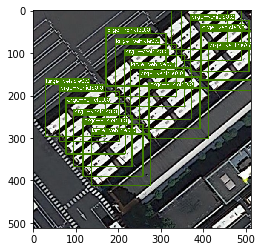

In [15]:
picked = 654
file_name = data.image_names[picked]
img = data.imgs[picked]
targets = data.targets[picked] # [x1, y1, x2, y2, cls_num]

boxes = targets[:, 0:4]
cls_nums = targets[:,4]
labels = [list(LABELS.keys())[int(num)] for num in cls_nums.tolist()]

visualize_bbox(file_name, boxes.tolist(), labels, np.zeros(boxes.size(0)), img_size = 512)

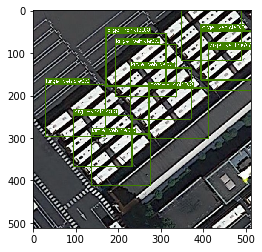

In [16]:
num_boxes = boxes.size()[0]
keeps = box_nms(boxes, torch.ones(num_boxes))

boxes_kept = boxes[keeps]
labels_kept = [labels[idx] for idx in keeps]
visualize_bbox(file_name, boxes_kept.tolist(), labels_kept, np.zeros(boxes_kept.size(0)), img_size = 512)